## Appendix: Methodology for Constructing the Opportunity Index

The goal of this project was to construct a consolidated index that captures student opportunity. The methodology for this project was inspired by a similar research initiative (see details [here](https://www.diversitydatakids.org/sites/default/files/2020-02/ddk_coi2.0_technical_documentation_20200212.pdf)). While this project calculates an index at the geographic level, our project calculates a school-specific indicator.  In essence, it answers the question: “What is the level of opportunity for a student at a specific school?” instead of “Which regions have the highest opportunity?”

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_dir = "../data/results/"
indicators = pd.read_csv(data_dir + 'indicators_by_school_unscaled.csv')
opp_index = pd.read_csv(data_dir + 'opportunity_index_by_school_scaled.csv')
df = pd.merge(indicators, opp_index[['ncessch', 'opportunity_index']], on = 'ncessch', how = 'inner')
indicators = ['salaries_crdc', 'free_or_reduced_price_lunch',
                'teachers_certified_fte_crdc', 'counselors_fte_crdc',
                'law_enforcement_fte_crdc', 'enrl_AP_crdc', 'FY 2017 Ending Budget',
                'food_stamps', 'above_pov_rate', 'internet_rate', 'emp_rate_25_64',
                'median_earnings', 'ds_pm_pred']

df['School Size'] = np.select(
    [
        df["enrollment_crdc"].between(0, 199), 
        df["enrollment_crdc"].between(200, 999),
        df["enrollment_crdc"].between(1000, 5000),
    ], 
    [
        'Small', 
        'Medium',
        'Large'
    ], 
    default='Unknown'
)

### Selected Variables of Interest

As a first step, we identified an outcome of interest that corresponds to student opportunity.  For the purposes of this project, we focused on the share of students who enrolled in college after graduation.  This measure includes traditional four-year colleges, community college, and trade schools.  We found that this metric was easily quantifiable and also meaningful from a qualitative standpoint.

As a next step, we identified indicator variables of interest.  We were interested in environmental factors and school-specific factors.  As part of our research process, we reviewed papers that addressed similar questions and also consulted University of Chicago faculty member, Professor Bruce Meyer.  After evaluating a variety of data sources and ultimately chose variables that (a) had explanatory power for college enrollment statistics and (b) were complete in the available data sources.  The scatterplots provided below illustrate the strengths of this relationship.


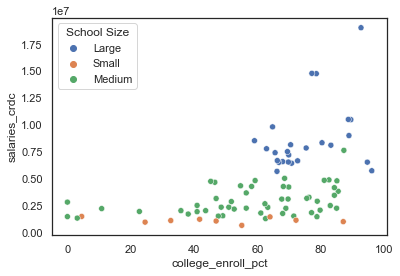

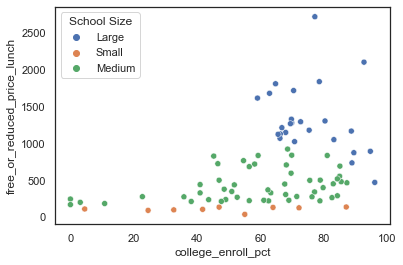

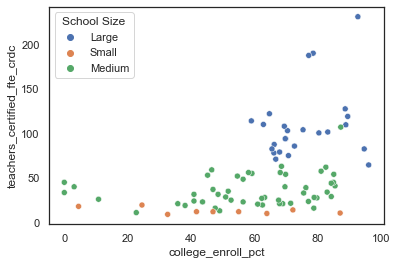

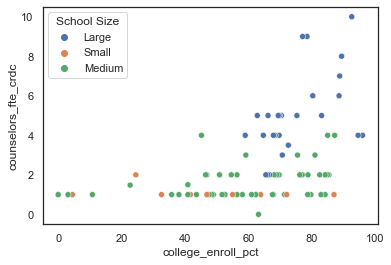

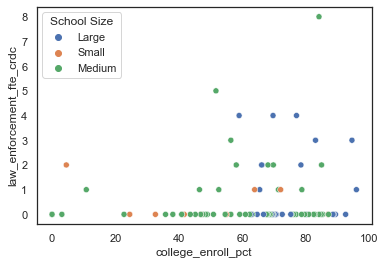

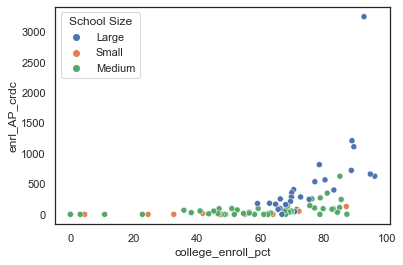

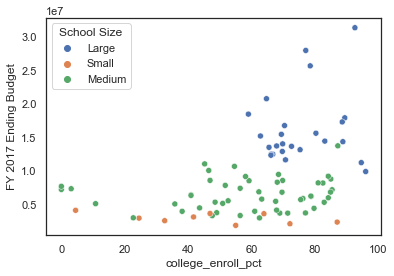

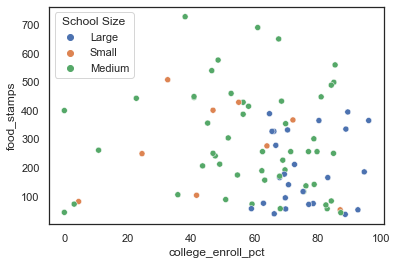

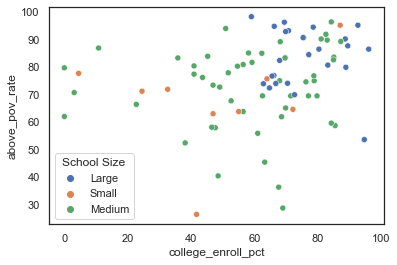

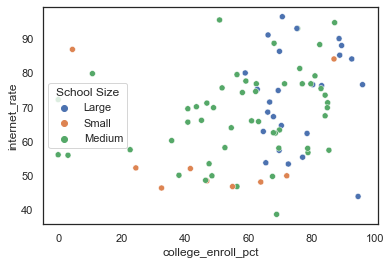

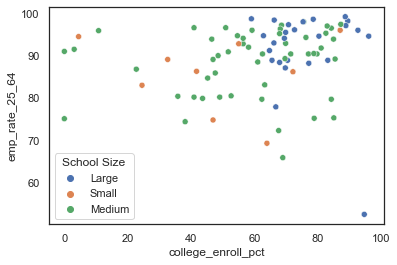

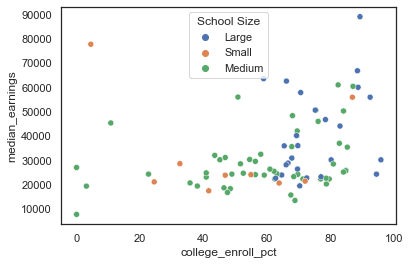

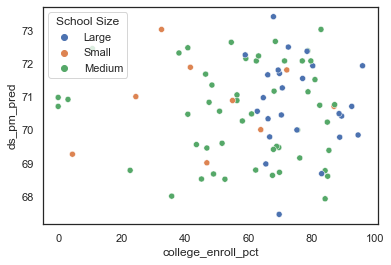

In [18]:
for var in indicators:
    plt.figure(var)
    sns.scatterplot(x = 'college_enroll_pct', y = var,
                    hue = 'School Size',
                    data = df)
#for var in indicators:

# sns.scatterplot(x="timepoint",
#                     y="signal",
#                     hue="region",
#                     style="event",
#                     data=fmri)

Once we had agreed on a set of indicator and outcome variables, we calculated the index.  The steps for this are as follows:
+ Scale aggregate variables:  Certain variables are not meaningful on their own unless they are scaled by some appropriate factor.  For example, the amount of budget allocated to schools was scaled by the number of students in a school.  Likewise, participation in supplemental nutrition programs was scaled by the number of households within the corresponding census tract. 
+ Standardize variables: To allow for easier comparison, the variables were standardized to have a mean of zero and a standard deviation of one.  Before this doing this step, we identified a few cases of missing values and imputed this value with the mean.
+ The methodology that inspired this project computed a weighted average of all indicators.  To compute the weights, we estimated regression models for each indicator to capture the strength of its predictive power on college enrollment:
$${Y} = \hat{\beta}_{0} + \hat{\beta}_{indicator} + {\epsilon}$$

Each regression model yields a $\hat{\beta}$ value which is the weight used to calculate a weighted mean of all the indicators, post-scaling and standardizing.


We feel reasonably confident about our selection of variables.  As seen above, they correlate strongly with college enrollment at the school level.  In addition, they are not highly correlated with each other.  The plot below shows the pair-wise correlation between each indicator variable.  Aside from certain statistics on school size and employment, we can see that these indicators are not strongly associated with each other.  This means that each indicator variable adds unique explanatory power to the index.

AxesSubplot(0.125,0.125;0.62x0.755)


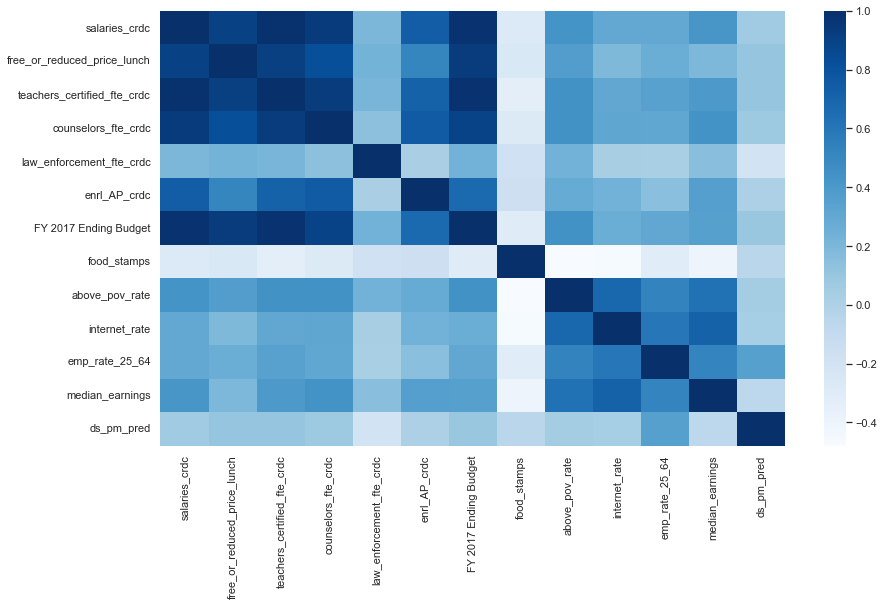

In [19]:
corr_data = df[indicators]

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = corr_data.corr()
heatmap = sns.heatmap(corr, cmap="Blues")
print(heatmap)